In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Matplotlib is building the font cache; this may take a moment.


##PART -A

In [2]:
STUDENT_ID = "PES1UG23AM309"

# AUTOMATIC ASSIGNMENT BASED ON SRN - DO NOT MODIFY

In [3]:
def get_student_assignment(student_id):
    """
    Generate unique polynomial TYPE and architecture based on student ID
    Uses last 3 digits of student ID for assignment
    """

    last_three = int(student_id[-3:])

    poly_type = last_three % 5

    np.random.seed(last_three)

    if poly_type == 0:
        degree = 2
        a = 0
        b = np.random.uniform(0.8, 1.5)
        c = np.random.uniform(3.0, 8.0)
        d = np.random.uniform(5.0, 15.0)
        poly_desc = f"QUADRATIC: y = {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 1:
        degree = 3
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.2, 0.2)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        poly_desc = f"CUBIC: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 2:
        degree = 4
        a = np.random.uniform(0.008, 0.02)
        b = np.random.uniform(1.5, 2.2)
        c = np.random.uniform(-1.0, 0.5)
        d = np.random.uniform(2.0, 5.0)
        e = np.random.uniform(8.0, 12.0)
        poly_desc = f"QUARTIC: y = {a:.4f}x⁴ + {b:.2f}x³ + {c:.2f}x² + {d:.2f}x + {e:.2f}"
        coefficients = (a, b, c, d, e)

    elif poly_type == 3:
        degree = "sine"
        a = np.random.uniform(1.5, 2.8)
        b = np.random.uniform(-0.8, 0.8)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        freq = np.random.uniform(0.02, 0.05)
        amp = np.random.uniform(5.0, 15.0)
        poly_desc = f"CUBIC + SINE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {amp:.1f}*sin({freq:.3f}x)"
        coefficients = (a, b, c, d, freq, amp)

    else:
        degree = "inverse"
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.0, 0.5)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        inv_coeff = np.random.uniform(50, 200)
        poly_desc = f"CUBIC + INVERSE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {inv_coeff:.1f}/x"
        coefficients = (a, b, c, d, inv_coeff)


    if poly_type in [0, 1]:
        coefficients = (a, b, c, d)


    noise_std = np.random.uniform(1.5, 2.5)


    arch_type = last_three % 4
    architectures = {
        0: {"hidden1": 64, "hidden2": 64, "lr": 0.001, "batch_desc": "Balanced Architecture"},
        1: {"hidden1": 32, "hidden2": 72, "lr": 0.005, "batch_desc": "Narrow-to-Wide Architecture"},
        2: {"hidden1": 72, "hidden2": 32, "lr": 0.001, "batch_desc": "Wide-to-Narrow Architecture"},
        3: {"hidden1": 96, "hidden2": 96, "lr": 0.003, "batch_desc": "Large Balanced Architecture"}
    }

    return {
        "polynomial_type": poly_type,
        "degree": degree,
        "coefficients": coefficients,
        "polynomial_desc": poly_desc,
        "noise_std": noise_std,
        "architecture": architectures[arch_type],
        "student_seed": last_three
    }

# Get your assignment
assignment = get_student_assignment(STUDENT_ID)
poly_type = assignment["polynomial_type"]
degree = assignment["degree"]
coefficients = assignment["coefficients"]
noise_std = assignment["noise_std"]
hidden1 = assignment["architecture"]["hidden1"]
hidden2 = assignment["architecture"]["hidden2"]
learning_rate = assignment["architecture"]["lr"]

print("="*70)
print(f"ASSIGNMENT FOR STUDENT ID: {STUDENT_ID}")
print("="*70)
print(f"Polynomial Type: {assignment['polynomial_desc']}")
print(f"Noise Level: ε ~ N(0, {noise_std:.2f})")
print(f"Architecture: Input(1) → Hidden({hidden1}) → Hidden({hidden2}) → Output(1)")
print(f"Learning Rate: {learning_rate}")
print(f"Architecture Type: {assignment['architecture']['batch_desc']}")
print("="*70)


ASSIGNMENT FOR STUDENT ID: PES1UG23AM309
Polynomial Type: CUBIC + INVERSE: y = 2.35x³ + 0.22x² + 5.42x + 9.95 + 95.4/x
Noise Level: ε ~ N(0, 2.17)
Architecture: Input(1) → Hidden(32) → Hidden(72) → Output(1)
Learning Rate: 0.005
Architecture Type: Narrow-to-Wide Architecture


# DATASET GENERATION - DO NOT MODIFY

In [4]:
np.random.seed(assignment["student_seed"])

n_samples = 100000
x = np.random.uniform(-100, 100, n_samples)


if poly_type == 0:
    _, b, c, d = coefficients
    y = b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)

elif poly_type == 1:
    a, b, c, d = coefficients
    y = a * x**3 + b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)

elif poly_type == 2:
    a, b, c, d, e = coefficients
    y = a * x**4 + b * x**3 + c * x**2 + d * x + e + np.random.normal(0, noise_std, n_samples)

elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y = a * x**3 + b * x**2 + c * x + d + amp * np.sin(freq * x) + np.random.normal(0, noise_std, n_samples)

else:
    a, b, c, d, inv_coeff = coefficients

    y = a * x**3 + b * x**2 + c * x + d + inv_coeff / (x + np.sign(x) * 0.1) + np.random.normal(0, noise_std, n_samples)


df = pd.DataFrame({'x': x, 'y': y})
df.to_csv('student_polynomial_dataset.csv', index=False)
print(f"Dataset with {n_samples:,} samples generated and saved!")

X = df['x'].values.reshape(-1, 1)
Y = df['y'].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
Y_train_scaled = scaler_Y.fit_transform(Y_train)
Y_test_scaled = scaler_Y.transform(Y_test)

print(f"Training samples: {len(X_train_scaled):,}")
print(f"Test samples: {len(X_test_scaled):,}")

Dataset with 100,000 samples generated and saved!
Training samples: 80,000
Test samples: 20,000


# ACTIVATION FUNCTIONS- TODO: IMPLEMENT

In [5]:
def relu(z):
    """
    ReLU Activation Function
    f(z) = max(0, z)
    """
    return np.maximum(0, z)

def relu_derivative(z):
    """
    Derivative of ReLU
    f'(z) = 1 if z > 0 else 0
    """
    return (z > 0).astype(float)

def tanh(z):
    """
    Tanh Activation Function
    f(z) = tanh(z)
    """
    return np.tanh(z)

def tanh_derivative(z):
    """
    Derivative of tanh
    f'(z) = 1 - tanh(z)^2
    """
    return 1 - np.tanh(z)**2


# LOSS FUNCTION- TODO: IMPLEMENT

In [6]:
def mse_loss(y_true, y_pred):
    """
    Mean Squared Error (MSE) Loss
    """
    return np.mean((y_true - y_pred) ** 2)


# WEIGHT INITIALIZATION - TODO: IMPLEMENT XAVIER INITIALIZATION
## **Xavier (Glorot) Initialization**

When training neural networks, how we initialize weights matters.  
- If weights are **too small** → activations and gradients vanish.  
- If weights are **too large** → activations and gradients explode.  

#**Xavier initialization** (Glorot & Bengio, 2010) balances this by keeping the variance of activations roughly the same across all layers.

---

### Formula

Let:  
- **fan_in** = number of input units to a layer  
- **fan_out** = number of output units from a layer  

The variance of weights is:

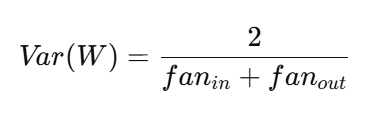


##Two common forms:  

#**Normal distribution:**  
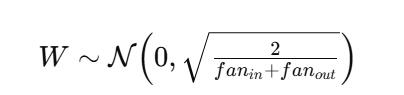

#**Uniform distribution:**  
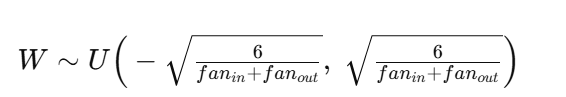

Biases are initialized to **0**.

---

### In This Assignment
- **W1 (input → hidden1):** `fan_in = input_dim`, `fan_out = hidden1`  
- **W2 (hidden1 → hidden2):** `fan_in = hidden1`, `fan_out = hidden2`  
- **W3 (hidden2 → output):** `fan_in = hidden2`, `fan_out = output_dim`  

Your task: compute the correct `xavier_std` for each layer, sample weights from a normal distribution with that std, and set biases = 0.



In [7]:
def xavier_initialization(input_dim, hidden1, hidden2, output_dim):
    """
    Xavier weight initialization (Normal distribution)
    W ~ N(0, sqrt(2 / (fan_in + fan_out)))
    Biases = 0
    """
    np.random.seed(assignment["student_seed"])

    # Layer 1: input → hidden1
    std1 = np.sqrt(2.0 / (input_dim + hidden1))
    W1 = np.random.randn(input_dim, hidden1) * std1
    b1 = np.zeros((1, hidden1))

    # Layer 2: hidden1 → hidden2
    std2 = np.sqrt(2.0 / (hidden1 + hidden2))
    W2 = np.random.randn(hidden1, hidden2) * std2
    b2 = np.zeros((1, hidden2))

    # Layer 3: hidden2 → output
    std3 = np.sqrt(2.0 / (hidden2 + output_dim))
    W3 = np.random.randn(hidden2, output_dim) * std3
    b3 = np.zeros((1, output_dim))

    return W1, b1, W2, b2, W3, b3


# FORWARD PROPAGATION - TODO: IMPLEMENT

In [8]:
def forward_pass(X, W1, b1, W2, b2, W3, b3, activation='relu'):
    """
    Forward propagation with configurable activation:
    Input → Hidden1(activation) → Hidden2(activation) → Output(Linear)
    """

    # Select activation function
    if activation == 'relu':
        act = relu
    elif activation == 'tanh':
        act = tanh
    else:
        raise ValueError("Unsupported activation")

    # Hidden layer 1
    z1 = X @ W1 + b1
    a1 = act(z1)

    # Hidden layer 2
    z2 = a1 @ W2 + b2
    a2 = act(z2)

    # Output layer (linear, no activation)
    z3 = a2 @ W3 + b3

    return z1, a1, z2, a2, z3


# BACKWARD PROPAGATION - TODO:IMPLEMENT

In [9]:
def backward_pass(X, Y_true, z1, a1, z2, a2, Y_pred, W2, W3, activation='relu'):
    """
    Backpropagation through 2-hidden-layer NN with configurable activation
    """

    # Select activation derivative
    if activation == 'relu':
        act_deriv = relu_derivative
    elif activation == 'tanh':
        act_deriv = tanh_derivative
    else:
        raise ValueError("Unsupported activation")

    m = len(X)  # batch size

    # Output layer (MSE loss derivative)
    dY_pred = (2/m) * (Y_pred - Y_true)   # shape: (m, 1)

    # Gradients for W3, b3
    dW3 = a2.T @ dY_pred
    db3 = np.sum(dY_pred, axis=0, keepdims=True)

    # Backprop into hidden layer 2
    da2 = dY_pred @ W3.T
    dz2 = da2 * act_deriv(z2)
    dW2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)

    # Backprop into hidden layer 1
    da1 = dz2 @ W2.T
    dz1 = da1 * act_deriv(z1)
    dW1 = X.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3


# TRAINING FUNCTION - TODO:  COMPLETE IMPLEMENTATION

In [10]:
def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - np.tanh(z)**2

def train_neural_network(X_train, Y_train, X_test, Y_test,
                         epochs=200, patience=10,
                         learning_rate=0.001, batch_size=None,
                         activation="relu", beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Train a 2-hidden-layer NN using the Adam optimizer.
    """
    # Initialize weights
    W1, b1, W2, b2, W3, b3 = xavier_initialization(1, hidden1, hidden2, 1)

    # Initialize Adam optimizer variables (m and v for each parameter)
    mW1, vW1 = np.zeros_like(W1), np.zeros_like(W1)
    mb1, vb1 = np.zeros_like(b1), np.zeros_like(b1)
    mW2, vW2 = np.zeros_like(W2), np.zeros_like(W2)
    mb2, vb2 = np.zeros_like(b2), np.zeros_like(b2)
    mW3, vW3 = np.zeros_like(W3), np.zeros_like(W3)
    mb3, vb3 = np.zeros_like(b3), np.zeros_like(b3)

    best_test_loss = float('inf')
    best_weights = None
    patience_counter = 0

    train_losses = []
    test_losses = []

    # Pick activation function
    if activation == "relu":
        act = relu
        act_deriv = relu_derivative
    elif activation == "leaky":
        act = lambda z: np.where(z > 0, z, 0.01*z)
        act_deriv = lambda z: np.where(z > 0, 1, 0.01)
    elif activation == "tanh":
        act = tanh
        act_deriv = tanh_derivative
    else:
        raise ValueError("Unsupported activation")

    print("Starting training (Adam optimizer)...")
    print(f"Architecture: 1 → {hidden1} → {hidden2} → 1")
    print(f"Learning Rate: {learning_rate}, Batch Size: {batch_size or 'full'}")
    print(f"Activation: {activation}")
    print(f"Max Epochs: {epochs}, Early Stopping Patience: {patience}")
    print("-" * 50)

    t = 0  # Time step for Adam bias correction

    for epoch in range(epochs):
        # Create mini-batches
        if batch_size is None:
            batches = [(X_train, Y_train)]
        else:
            batches = iterate_minibatches(X_train, Y_train, batch_size)

        for X_batch, Y_batch in batches:
            t += 1  # Increment time step

            # Forward pass
            z1 = X_batch @ W1 + b1
            a1 = act(z1)
            z2 = a1 @ W2 + b2
            a2 = act(z2)
            Y_pred_batch = a2 @ W3 + b3

            # Backpropagation
            dY_pred = (2 / len(X_batch)) * (Y_pred_batch - Y_batch)

            dW3 = a2.T @ dY_pred
            db3 = np.sum(dY_pred, axis=0, keepdims=True)

            da2 = dY_pred @ W3.T
            dz2 = da2 * act_deriv(z2)
            dW2 = a1.T @ dz2
            db2 = np.sum(dz2, axis=0, keepdims=True)

            da1 = dz2 @ W2.T
            dz1 = da1 * act_deriv(z1)
            dW1 = X_batch.T @ dz1
            db1 = np.sum(dz1, axis=0, keepdims=True)

            # === Adam update for each parameter ===
            for param, dparam, m, v in zip(
                [W1, b1, W2, b2, W3, b3],
                [dW1, db1, dW2, db2, dW3, db3],
                [mW1, mb1, mW2, mb2, mW3, mb3],
                [vW1, vb1, vW2, vb2, vW3, vb3],
            ):
                # Update biased first moment estimate
                m[:] = beta1 * m + (1 - beta1) * dparam
                # Update biased second raw moment estimate
                v[:] = beta2 * v + (1 - beta2) * (dparam ** 2)

                # Compute bias-corrected estimates
                m_hat = m / (1 - beta1 ** t)
                v_hat = v / (1 - beta2 ** t)

                # Update parameter
                param -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

        # Compute losses
        _, _, _, _, Y_pred_train = forward_pass(X_train, W1, b1, W2, b2, W3, b3)
        train_loss = mse_loss(Y_train, Y_pred_train)

        _, _, _, _, Y_pred_test = forward_pass(X_test, W1, b1, W2, b2, W3, b3)
        test_loss = mse_loss(Y_test, Y_pred_test)

        train_losses.append(train_loss)
        test_losses.append(test_loss)

        # Progress print
        if (epoch + 1) % 20 == 0:
            print(f"Epoch {epoch+1:3d}: Train Loss = {train_loss:.6f}, Test Loss = {test_loss:.6f}")

        # Early stopping
        if test_loss < best_test_loss:
            best_test_loss = test_loss
            best_weights = (W1.copy(), b1.copy(), W2.copy(), b2.copy(), W3.copy(), b3.copy())
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            print(f"Best test loss: {best_test_loss:.6f}")
            break

    return best_weights, train_losses, test_losses


# EXECUTE TRAINING

In [11]:
print("Training Neural Network with your specific configuration...")
weights, train_losses, test_losses = train_neural_network(
    X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled,
    epochs=500, patience=10
)

Training Neural Network with your specific configuration...
Starting training (Adam optimizer)...
Architecture: 1 → 32 → 72 → 1
Learning Rate: 0.001, Batch Size: full
Activation: relu
Max Epochs: 500, Early Stopping Patience: 10
--------------------------------------------------
Epoch  20: Train Loss = 0.552202, Test Loss = 0.550454
Epoch  40: Train Loss = 0.267796, Test Loss = 0.267921
Epoch  60: Train Loss = 0.188795, Test Loss = 0.189562
Epoch  80: Train Loss = 0.162076, Test Loss = 0.162744
Epoch 100: Train Loss = 0.133045, Test Loss = 0.133610
Epoch 120: Train Loss = 0.104176, Test Loss = 0.104653
Epoch 140: Train Loss = 0.078071, Test Loss = 0.078492
Epoch 160: Train Loss = 0.056421, Test Loss = 0.056793
Epoch 180: Train Loss = 0.039945, Test Loss = 0.040252
Epoch 200: Train Loss = 0.027912, Test Loss = 0.028122
Epoch 220: Train Loss = 0.019245, Test Loss = 0.019361
Epoch 240: Train Loss = 0.013260, Test Loss = 0.013304
Epoch 260: Train Loss = 0.009080, Test Loss = 0.009090
Epoch

# RESULTS VISUALIZATION

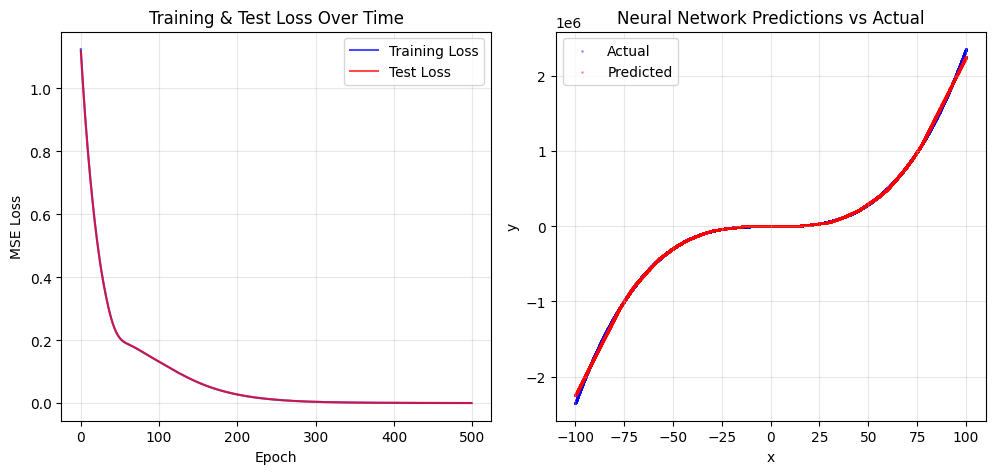

In [12]:
# Plot training progress
plt.figure(figsize=(15, 5))

# Loss curves
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Training Loss', color='blue', alpha=0.7)
plt.plot(test_losses, label='Test Loss', color='red', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training & Test Loss Over Time')
plt.legend()
plt.grid(True, alpha=0.3)

# Get final predictions for visualization
W1, b1, W2, b2, W3, b3 = weights
_, _, _, _, Y_pred_scaled = forward_pass(X_test_scaled, W1, b1, W2, b2, W3, b3)

# Inverse transform to original scale
Y_test_orig = scaler_Y.inverse_transform(Y_test_scaled)
Y_pred_orig = scaler_Y.inverse_transform(Y_pred_scaled)
X_test_orig = scaler_X.inverse_transform(X_test_scaled)

# Predictions vs Actual
plt.subplot(1, 3, 2)
plt.scatter(X_test_orig, Y_test_orig, s=1, alpha=0.3, label='Actual', color='blue')
plt.scatter(X_test_orig, Y_pred_orig, s=1, alpha=0.3, label='Predicted', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Predictions vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)

# Residual plot
# plt.subplot(1, 3, 3)
# residuals = Y_test_orig.flatten() - Y_pred_orig.flatten()
# plt.scatter(X_test_orig, residuals, s=1, alpha=0.3, color='green')
# plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
# plt.xlabel('x')
# plt.ylabel('Residuals (Actual - Predicted)')
# plt.title('Residual Analysis')
# plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

SPECIFIC PREDICTION TEST

In [13]:

x_test_value = 90.2
x_new = np.array([[x_test_value]])
x_new_scaled = scaler_X.transform(x_new)

_, _, _, _, y_pred_scaled = forward_pass(x_new_scaled, W1, b1, W2, b2, W3, b3)
y_pred = scaler_Y.inverse_transform(y_pred_scaled)

if poly_type == 0:
    _, b, c, d = coefficients
    y_true = b * x_test_value**2 + c * x_test_value + d

elif poly_type == 1:
    a, b, c, d = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d

elif poly_type == 2:
    a, b, c, d, e = coefficients
    y_true = a * x_test_value**4 + b * x_test_value**3 + c * x_test_value**2 + d * x_test_value + e

elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d + amp * np.sin(freq * x_test_value)

else:
    a, b, c, d, inv_coeff = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d + inv_coeff / (x_test_value + np.sign(x_test_value) * 0.1)

print("\n" + "="*60)
print("PREDICTION RESULTS FOR x = 90.2")
print("="*60)
print(f"Neural Network Prediction: {y_pred[0][0]:,.2f}")
print(f"Ground Truth (formula):    {y_true:,.2f}")
print(f"Absolute Error:            {abs(y_pred[0][0] - y_true):,.2f}")
print(f"Relative Error:            {abs(y_pred[0][0] - y_true)/abs(y_true)*100:.3f}%")
print("="*60 + "\n")




PREDICTION RESULTS FOR x = 90.2
Neural Network Prediction: 1,748,831.25
Ground Truth (formula):    1,728,013.61
Absolute Error:            20,817.64
Relative Error:            1.205%



# PERFORMANCE METRICS

In [14]:
# Calculate final performance metrics
final_train_loss = train_losses[-1] if train_losses else float('inf')
final_test_loss = test_losses[-1] if test_losses else float('inf')

# Calculate R² score
y_test_mean = np.mean(Y_test_orig)
ss_res = np.sum((Y_test_orig - Y_pred_orig) ** 2)
ss_tot = np.sum((Y_test_orig - y_test_mean) ** 2)
r2_score = 1 - (ss_res / ss_tot)

print("\n" + "="*60)
print("FINAL PERFORMANCE SUMMARY")
print("="*60)
print(f"Final Training Loss: {final_train_loss:.6f}")
print(f"Final Test Loss:     {final_test_loss:.6f}")
print(f"R² Score:            {r2_score:.4f}")
print(f"Total Epochs Run:    {len(train_losses)}")
print("="*60 + "\n")



FINAL PERFORMANCE SUMMARY
Final Training Loss: 0.000414
Final Test Loss:     0.000413
R² Score:            0.9996
Total Epochs Run:    500



##  Hyperparameter Experiment Automation

section for automation of the process of testing different neural network configurations.  
Instead of manually changing learning rates, batch sizes, activations, or epochs.

The workflow is as follows:
1. **Baseline** – Train the network with default learning rate, full-batch gradient descent,
   ReLU activation, and default number of epochs.
2. **High Learning Rate** – Increase the learning rate to see how it affects convergence speed
   and stability.
3. **Mini-Batch / Increased Batch Size** – Train using smaller batches to study impact on
   training dynamics and generalization.
4. **Longer Training / More Epochs** – Increase the maximum number of epochs and patience to
   observe if additional training improves performance.
5. **Leaky ReLU Activation** – Replace ReLU with Leaky ReLU to reduce dead neuron issues
   and potentially improve gradient flow.

In [15]:
import numpy as np

def iterate_minibatches(X, Y, batch_size, shuffle=True):
    assert X.shape[0] == Y.shape[0]
    n_samples = X.shape[0]
    indices = np.arange(n_samples)
    if shuffle:
        np.random.shuffle(indices)
    for start_idx in range(0, n_samples, batch_size):
        end_idx = min(start_idx + batch_size, n_samples)
        excerpt = indices[start_idx:end_idx]
        yield X[excerpt], Y[excerpt]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def run_experiments(x_test_value=90.2):
    # Inverse transform test data once (outside loop, since test data is fixed)
    Y_test_orig = scaler_Y.inverse_transform(Y_test_scaled)
    X_test_orig = scaler_X.inverse_transform(X_test_scaled)

    experiments = [
        {"name": "Baseline", "lr": learning_rate, "batch_size": None, "epochs": 500, "activation": "relu", "patience": 10},
        {"name": "High LR", "lr": 0.005, "batch_size": None, "epochs": 500, "activation": "relu", "patience": 10},
        {"name": "Mini-batch", "lr": learning_rate, "batch_size": 64, "epochs": 500, "activation": "relu", "patience": 10},
        {"name": "Longer Training", "lr": learning_rate, "batch_size": None, "epochs": 1000, "activation": "relu", "patience": 25},
        {"name": "LeakyReLU", "lr": learning_rate, "batch_size": None, "epochs": 500, "activation": "leaky", "patience": 10},
    ]

    results = []

    for cfg in experiments:
        print("\n" + "="*70)
        print(f"Running Experiment: {cfg['name']}")
        print("="*70)

        weights, train_losses, test_losses = train_neural_network(
            X_train_scaled, Y_train_scaled,
            X_test_scaled, Y_test_scaled,
            epochs=cfg["epochs"],
            patience=cfg["patience"],
            learning_rate=cfg["lr"],
            batch_size=cfg["batch_size"],
            activation=cfg["activation"]
        )

        W1, b1, W2, b2, W3, b3 = weights
        _, _, _, _, Y_pred_scaled = forward_pass(X_test_scaled, W1, b1, W2, b2, W3, b3)
        Y_pred_orig = scaler_Y.inverse_transform(Y_pred_scaled)

        final_train_loss = train_losses[-1] if train_losses else float('inf')
        final_test_loss = test_losses[-1] if test_losses else float('inf')
        epochs_run = len(train_losses)
        y_test_mean = np.mean(Y_test_orig)
        ss_res = np.sum((Y_test_orig - Y_pred_orig) ** 2)
        ss_tot = np.sum((Y_test_orig - y_test_mean) ** 2)
        r2_score = 1 - (ss_res / ss_tot)

        # Specific prediction for x_test_value
        x_new = np.array([[x_test_value]])
        x_new_scaled = scaler_X.transform(x_new)
        _, _, _, _, y_pred_scaled = forward_pass(x_new_scaled, W1, b1, W2, b2, W3, b3)
        y_pred = scaler_Y.inverse_transform(y_pred_scaled)

        # Calculate ground truth value based on poly_type and coefficients
        if poly_type == 0:
            _, b, c, d = coefficients
            y_true = b * x_test_value**2 + c * x_test_value + d
        elif poly_type == 1:
            a, b, c, d = coefficients
            y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d
        elif poly_type == 2:
            a, b, c, d, e = coefficients
            y_true = a * x_test_value**4 + b * x_test_value**3 + c * x_test_value**2 + d * x_test_value + e
        elif poly_type == 3:
            a, b, c, d, freq, amp = coefficients
            y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d + amp * np.sin(freq * x_test_value)
        else:
            a, b, c, d, inv_coeff = coefficients
            y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d + inv_coeff / (x_test_value + np.sign(x_test_value) * 0.1)

        print("\n" + "="*60)
        print(f"PREDICTION RESULTS FOR x = {x_test_value}")
        print("="*60)
        print(f"Neural Network Prediction: {y_pred[0][0]:,.2f}")
        print(f"Ground Truth (formula):    {y_true:,.2f}")
        print(f"Absolute Error:            {abs(y_pred[0][0] - y_true):,.2f}")
        print(f"Relative Error:            {abs(y_pred[0][0] - y_true)/abs(y_true)*100:.3f}%")

        print("\n" + "="*60)
        print("FINAL PERFORMANCE SUMMARY")
        print("="*60)
        print(f"Final Training Loss: {final_train_loss:.6f}")
        print(f"Final Test Loss:     {final_test_loss:.6f}")
        print(f"R² Score:            {r2_score:.4f}")
        print(f"Total Epochs Run:    {epochs_run}")

        # Store results in list for DataFrame
        results.append({
            "Experiment": cfg["name"],
            "Learning Rate": cfg["lr"],
            "Batch Size": cfg["batch_size"] or "Full",
            "Epochs Max": cfg["epochs"],
            "Epochs Run": epochs_run,
            "Activation": cfg["activation"],
            "Train Loss": final_train_loss,
            "Test Loss": final_test_loss,
            "R² Score": r2_score,
            f"Pred NN(x={x_test_value})": y_pred[0][0],
            f"True(x={x_test_value})": y_true,
            "Abs Error": abs(y_pred[0][0] - y_true),
            "Rel Error %": abs(y_pred[0][0] - y_true)/abs(y_true)*100
        })

        # --- Plots ---
        plt.figure(figsize=(12, 4))

        # Loss curves
        plt.subplot(1, 2, 1)
        plt.plot(train_losses, label="Train Loss")
        plt.plot(test_losses, label="Test Loss")
        plt.xlabel("Epochs")
        plt.ylabel("MSE Loss")
        plt.title(f"Loss Curves - {cfg['name']}")
        plt.legend()
        plt.grid(alpha=0.3)

        # Predictions vs Actual
        plt.subplot(1, 2, 2)
        plt.scatter(X_test_orig, Y_test_orig, s=1, alpha=0.3, label="Actual")
        plt.scatter(X_test_orig, Y_pred_orig, s=1, alpha=0.3, label="Predicted")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title(f"Predictions vs Actual - {cfg['name']}")
        plt.legend()
        plt.grid(alpha=0.3)

        plt.tight_layout()
        plt.show()

    results_df = pd.DataFrame(results)
    print("\n" + "="*70)
    print("EXPERIMENT RESULTS SUMMARY (TABLE)")
    print("="*70)
    print(results_df)

    results_df.to_csv("experiment_results.csv", index=False)
    return results_df

# Run all experiments and get the summary DataFrame
results_df = run_experiments()



Running Experiment: Baseline
Starting training (Adam optimizer)...
Architecture: 1 → 32 → 72 → 1
Learning Rate: 0.005, Batch Size: full
Activation: relu
Max Epochs: 500, Early Stopping Patience: 10
--------------------------------------------------
Epoch  20: Train Loss = 0.176387, Test Loss = 0.177313
Epoch  40: Train Loss = 0.082434, Test Loss = 0.082873
Epoch  60: Train Loss = 0.022723, Test Loss = 0.022952
Epoch  80: Train Loss = 0.005609, Test Loss = 0.005596
Epoch 100: Train Loss = 0.001853, Test Loss = 0.001827
Epoch 120: Train Loss = 0.000825, Test Loss = 0.000811
Epoch 140: Train Loss = 0.000462, Test Loss = 0.000452
Epoch 160: Train Loss = 0.000295, Test Loss = 0.000287
Epoch 180: Train Loss = 0.000203, Test Loss = 0.000198
Epoch 200: Train Loss = 0.000147, Test Loss = 0.000143
Epoch 220: Train Loss = 0.000111, Test Loss = 0.000108
Epoch 240: Train Loss = 0.000086, Test Loss = 0.000084
Epoch 260: Train Loss = 0.000068, Test Loss = 0.000067
Epoch 280: Train Loss = 0.000056, T